In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Liberias para la parte de metodologia
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

<link rel="stylesheet" href='dhds.css'>
<div class="Heading">
    <h1 align="center"> Sports Analytic </h1>
    <h2 align="center"> Machine Learning Supervise Classification </h2>
</div>

In [4]:
df=pd.read_csv('nba_logreg.csv')

In [5]:
df.head(3)

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0


In [6]:
description = ['Name','Games Played','Minutes Played','Points Per Game','Fields Goald Made','Fields Goals Attempts','% fields Goal Percent',
'3 Points Made','3 Points Attempts','3 Point Percent','Free Throw Made','Free Throw Attempts','Free throw Percent','Offensive Rebounds','Deffensive Rebounds',
'Rebounds','Assist','Steals','Blocks','Turnovers','Target_5years']
table = pd.DataFrame()
table['Category'] = df.columns
table['Description'] = description

table.style.set_properties(**{'text-align':'center','padding-left':'100px'})

,Category,Description
0,name,Name
1,gp,Games Played
2,min,Minutes Played
3,pts,Points Per Game
4,fgm,Fields Goald Made
5,fga,Fields Goals Attempts
6,fg,% fields Goal Percent
7,3p_made,3 Points Made
8,3pa,3 Points Attempts
9,3p,3 Point Percent


In [7]:
print("""""")
print(f'Numbers of rows: {df.shape[0]}')
print(f'Numbers of features: {df.shape[1]}')
print('------------------')
print("""""")
nulls = df.isnull().sum()
types = df.dtypes
show_me = pd.DataFrame ()
show_me['type'] =types
show_me['numbers of nulls'] = nulls
show_me['% of nulls'] = round(nulls*100/df.shape[0],2)
show_me.style.bar(subset=None, axis=0, color='#7FFFD4', width=100, align='left', vmin=None, vmax=None)


Numbers of rows: 1340
Numbers of features: 21
------------------



,type,numbers of nulls,% of nulls
name,object,0,0.000000
gp,int64,0,0.000000
min,float64,0,0.000000
pts,float64,0,0.000000
fgm,float64,0,0.000000
fga,float64,0,0.000000
fg,float64,0,0.000000
3p_made,float64,0,0.000000
3pa,float64,0,0.000000
3p,float64,11,0.820000


<h2>3.1 Data Clean</h2>

In [8]:
# Mask null data in 3p feature
mask=df['3p'].notnull()
df=df[mask]
df.shape

(1329, 21)

In [9]:
#Drop duplicates
df[df.duplicated(subset=['name','gp'])]
df = df.drop_duplicates(subset=['name','gp'])
df.shape

(1298, 21)

###### Sample

In [10]:
df_10=df.sample(frac=0.1,random_state=2)
print(df.shape)
print(df_10.shape)

(1298, 21)
(130, 21)


In [11]:
df = df.drop(df_10.index)
df.shape

(1168, 21)

<h2> 3.2. Data Analysis</h2>

###### correlation

C:\Users\Alejandra\AppData\Local\Temp\ipykernel_24488\1958566095.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


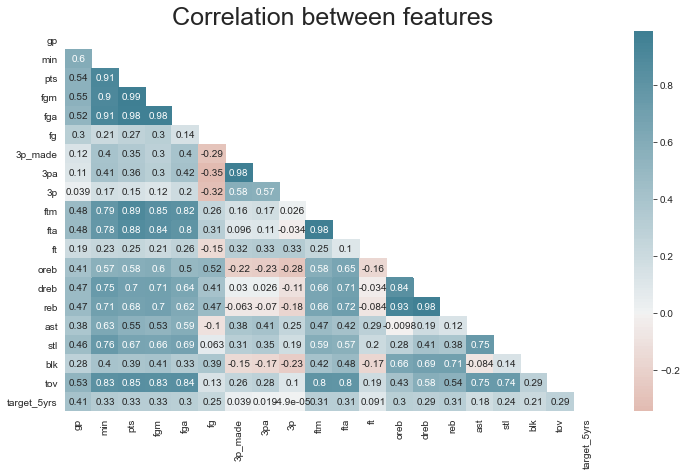

In [12]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Correlation between features", fontsize = 25);
plt.show()

As it is expected, features resulting of the mathematical operation of others features have a strong correlation with them. Such as 3p% between 3pa and 3pm. Also the feature label 'number games played'shows a solid correlation with 'minutes played'.In the other hand, the target shows low correlation with '3 points' features. 

<Figure size 1080x720 with 0 Axes>

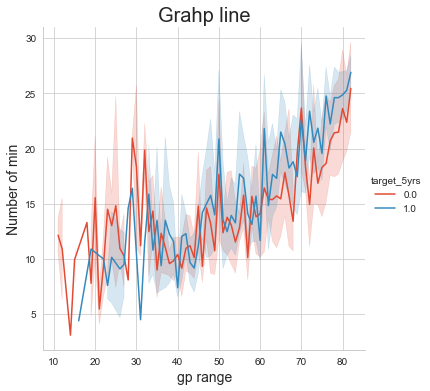

In [13]:
plt.figure(figsize=(15,10))
xprop = 'gp'
yprop = 'min'
sns.relplot(data=df, x=xprop, y=yprop, hue='target_5yrs',kind='line')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Grahp line'.format(yprop), size=20)
plt.show()

The line graph illustrates the amounts of minutes per game played for positive class (target_5yrs = 1, blue) and negative class (target_5yrs =0, red). Overall, both classes increased with the number of games played, with a slight difference in the rise of the positive class, when the number of games is higher. 
The opposite occurs in the left inferior edge of the graph where is a prevalence of negative class. This might be indicating that rookies with lower performance have played fewer games and have fewer minutes on the playing field.     

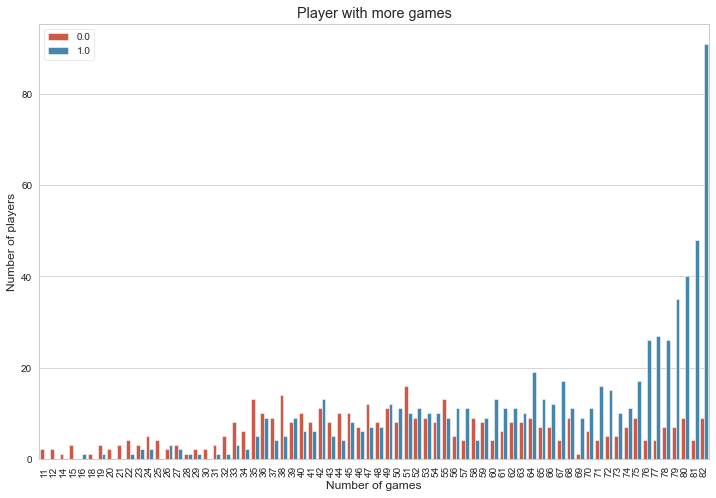

In [14]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'gp', data = df, hue='target_5yrs')
plt.xticks(rotation = 90)
plt.title("Player with more games")
plt.xlabel("Number of games")
plt.ylabel("Number of players")
plt.legend(loc='upper left')
plt.show()

The count plot illustrates the numbers of players per class with more games. The possitive class shows an increased in the number of games.  

<h2> 4. Methology</h2>

In [15]:
y=df['target_5yrs']
y.value_counts(normalize=True).round(2)

1.0    0.62
0.0    0.38
Name: target_5yrs, dtype: float64

In [16]:
X=df.drop(['target_5yrs','name'], axis=1)

In [17]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=y.unique(), values=y.groupby(y).count(), hole=.3)])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=1.02,xanchor="right",x=1))

fig.show()

Due to the imbalance of the class, it was decided to incorporate the stratification function to improve the robustness of the results.

In [18]:
#### Creacion de funcion para uso futuro

def Calculo_Metricas(TTest, TPred):
    y_T = TTest
    y_P = TPred
    
    #calculamos cada metrica
    
    # Accuracy
    Accuracy=(accuracy_score(y_T, y_P)).round(2)
    
    # confusion_matrix
    confusion = confusion_matrix(y_T, y_P)
    
    # apertura de la Matriz
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # Recall
    Recall = (recall_score(y_T, y_P)).round(2)
    
    # Specificity
    specificity = (TN / (TN + FP)).round(2)
    
    # Precision
    Precision = (precision_score(y_T, y_P)).round(2)
    
    # False positive rate
    FPR = (1-specificity).round(2)

    #  F1-Score
    F1Score = (f1_score(y_T,y_P)).round(2)
    
    return Accuracy, confusion, Recall, specificity, Precision, FPR, F1Score

#### 4.1 KNN

In [19]:
# Separacion en set de testeo y train para evaluar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle= True, random_state = 0)

In [20]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1, 40))
param_grid = dict(n_neighbors=k_range)


In [21]:
metricas=['manhattan','euclidean']
metric_dic=dict(metric=metricas)
print (metric_dic)

{'metric': ['manhattan', 'euclidean']}


In [22]:
param_grid.update(metric_dic)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'metric': ['manhattan', 'euclidean']}


In [23]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [24]:
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='recall') 

In [25]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='recall')

In [26]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan')

KNN with best parameters 

In [27]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=13)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,random_state=2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
knn.fit(X_train, y_train);
X_test=scaler.fit_transform(X_test) 
y_pred = knn.predict(X_test)

#LLamamos a la funcion para calcular las metricas
resultados_metricas=Calculo_Metricas(y_test, y_pred)

y_pred_knn_proba = knn.predict_proba(X_test)

In [28]:
# Se arma el cuadro comparativo entre modelos y metricas
columna = ['KNN'] # definimos el nombre de la columna
filas = ['Accuracy','TP','TN','FP','FN','Recall','Specificity','Precision','FPR', 'F1-Score'] # definimos los nombres de las filas
Valores = [resultados_metricas[0], resultados_metricas[1][1,1], resultados_metricas[1][0,0], 
           resultados_metricas[1][0,1], resultados_metricas[1][1,0], resultados_metricas[2], 
           resultados_metricas[3], resultados_metricas[4], resultados_metricas[5], resultados_metricas[6]]

Metricas = pd.DataFrame(Valores, columns=columna, index=filas)

In [29]:
Metricas

,KNN
Accuracy,0.67
TP,134.00
TN,63.00
FP,49.00
FN,46.00
Recall,0.74
Specificity,0.56
Precision,0.73
FPR,0.44
F1-Score,0.74


This models had a recall= 0.74 and F1-Score = 0.74 

<a id="NB"></a>
<h2> 4.2. Naive Bayes</h2>
A multinomialNB was used to this project

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y,random_state=2)

In [32]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [33]:
model.score(X_test, y_test)

0.6404109589041096

In [34]:
y_pred = model.predict(X_test)

In [35]:
# Generacion de función para calcular las metricas
resultados_metricas=Calculo_Metricas(y_test, y_pred)

y_pred_MultinomialNB_proba = model.predict_proba(X_test)

#Agregamos los datos del modelo al cuadro comparativo

Valores = [resultados_metricas[0], resultados_metricas[1][1,1], resultados_metricas[1][0,0], 
           resultados_metricas[1][0,1], resultados_metricas[1][1,0], resultados_metricas[2], 
           resultados_metricas[3], resultados_metricas[4], resultados_metricas[5], resultados_metricas[6]]

Metricas.insert(1, "MultinomialNB", Valores, allow_duplicates=False)
print(Metricas)

                KNN  MultinomialNB
Accuracy       0.67           0.64
TP           134.00         118.00
TN            63.00          69.00
FP            49.00          43.00
FN            46.00          62.00
Recall         0.74           0.66
Specificity    0.56           0.62
Precision      0.73           0.73
FPR            0.44           0.38
F1-Score       0.74           0.69


<a id="GB"></a>
<h2> 4.3. GaussianNB</h2>

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = gnb.predict(X_test)

In [39]:
#LLamamos a la funcion para calcular las petricas
resultados_metricas=Calculo_Metricas(y_test, y_pred)

y_pred_GaussianNB_proba = gnb.predict_proba(X_test)

#Agregamos los datos del modelo al cuadro comparativo

Valores = [resultados_metricas[0], resultados_metricas[1][1,1], resultados_metricas[1][0,0], 
           resultados_metricas[1][0,1], resultados_metricas[1][1,0], resultados_metricas[2], 
           resultados_metricas[3], resultados_metricas[4], resultados_metricas[5], resultados_metricas[6]]

Metricas.insert(Metricas.shape[1], "GaussianNB", Valores, allow_duplicates=False)
print(Metricas)

                KNN  MultinomialNB  GaussianNB
Accuracy       0.67           0.64        0.64
TP           134.00         118.00      100.00
TN            63.00          69.00       88.00
FP            49.00          43.00       24.00
FN            46.00          62.00       80.00
Recall         0.74           0.66        0.56
Specificity    0.56           0.62        0.79
Precision      0.73           0.73        0.81
FPR            0.44           0.38        0.21
F1-Score       0.74           0.69        0.66


<a id="RL"></a>
<h2> 4.4. Logistic Regression</h2>

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,random_state=2)

In [42]:
logistic_regression = LogisticRegression(penalty='none', max_iter=100000)
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=100000, penalty='none')

In [43]:
y_test_pred = logistic_regression.predict(X_test)

In [44]:
#LLamamos a la funcion para calcular las metricas
resultados_metricas=Calculo_Metricas(y_test, y_test_pred)

#Agregamos los datos del modelo al cuadro comparativo

Valores = [resultados_metricas[0], resultados_metricas[1][1,1], resultados_metricas[1][0,0], 
           resultados_metricas[1][0,1], resultados_metricas[1][1,0], resultados_metricas[2], 
           resultados_metricas[3], resultados_metricas[4], resultados_metricas[5], resultados_metricas[6]]

Metricas.insert(Metricas.shape[1], "Reg. Log.", Valores, allow_duplicates=False)
print(Metricas)

                KNN  MultinomialNB  GaussianNB  Reg. Log.
Accuracy       0.67           0.64        0.64       0.67
TP           134.00         118.00      100.00     139.00
TN            63.00          69.00       88.00      57.00
FP            49.00          43.00       24.00      55.00
FN            46.00          62.00       80.00      41.00
Recall         0.74           0.66        0.56       0.77
Specificity    0.56           0.62        0.79       0.51
Precision      0.73           0.73        0.81       0.72
FPR            0.44           0.38        0.21       0.49
F1-Score       0.74           0.69        0.66       0.74


In [45]:
logistic_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [46]:
y_pred_RegLog_proba = logistic_regression.predict_proba(X_test)

In [47]:
confusion_matrix(y_test, y_test_pred)

array([[ 57,  55],
       [ 41, 139]], dtype=int64)

In [48]:
# Se utiliza sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [49]:
import statsmodels.api as sm
X_train_stats = sm.add_constant(X_train_scaled)

In [50]:
# Instanciamos la clase
logit = sm.Logit(y_train, X_train_stats)
# Fiteamos el modelo
result = logit.fit()
# Imprimimos el resumen
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.534546
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.196     
Dependent Variable: target_5yrs      AIC:              976.5249  
Date:               2022-04-27 13:58 BIC:              1072.0322 
No. Observations:   876              Log-Likelihood:   -468.26   
Df Model:           19               LL-Null:          -582.27   
Df Residuals:       856              LLR p-value:      8.5041e-38
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const     0.6707     0.0873    7.6866   0.0000     0.4997    0.8417
x1        0.6165     0.1032    5.9716   0.0000     0.4142 

In [51]:
X=df.drop(['target_5yrs','name','fta','dreb','oreb','ftm','3pa','3p_made','fga','fgm'], axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y,random_state=2)

In [53]:
logistic_regression = LogisticRegression(penalty='none', max_iter=100000)
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=100000, penalty='none')

In [54]:
y_test_pred = logistic_regression.predict(X_test)

In [55]:
#LLamamos a la funcion para calcular las petricas
resultados_metricas=Calculo_Metricas(y_test, y_test_pred)

y_pred_RegLogModif_proba = logistic_regression.predict_proba(X_test)

#Agregamos los datos del modelo al cuadro comparativo

Valores = [resultados_metricas[0], resultados_metricas[1][1,1], resultados_metricas[1][0,0], 
           resultados_metricas[1][0,1], resultados_metricas[1][1,0], resultados_metricas[2], 
           resultados_metricas[3], resultados_metricas[4], resultados_metricas[5], resultados_metricas[6]]

Metricas.insert(Metricas.shape[1], "Reg. Log. Modific.", Valores, allow_duplicates=False)
print(Metricas)

                KNN  MultinomialNB  GaussianNB  Reg. Log.  Reg. Log. Modific.
Accuracy       0.67           0.64        0.64       0.67                0.71
TP           134.00         118.00      100.00     139.00              148.00
TN            63.00          69.00       88.00      57.00               58.00
FP            49.00          43.00       24.00      55.00               54.00
FN            46.00          62.00       80.00      41.00               32.00
Recall         0.74           0.66        0.56       0.77                0.82
Specificity    0.56           0.62        0.79       0.51                0.52
Precision      0.73           0.73        0.81       0.72                0.73
FPR            0.44           0.38        0.21       0.49                0.48
F1-Score       0.74           0.69        0.66       0.74                0.77


In [56]:
accuracy_score(y_test, y_test_pred)

0.7054794520547946

In [57]:
X_train_scaled = scaler.fit_transform(X_train)

In [58]:
X_train_stats = sm.add_constant(X_train_scaled)

In [59]:
# Instanciamos la clase
logit = sm.Logit(y_train, X_train_stats)
# Fiteamos el modelo
result = logit.fit()
# Imprimimos el resumen
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.548060
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.175     
Dependent Variable: target_5yrs      AIC:              984.2009  
Date:               2022-04-27 13:58 BIC:              1041.5053 
No. Observations:   876              Log-Likelihood:   -480.10   
Df Model:           11               LL-Null:          -582.27   
Df Residuals:       864              LLR p-value:      9.3905e-38
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.6605     0.0855    7.7286   0.0000    0.4930    0.8280
x1         0.6113     0.1004    6.0892   0.0000    0.4145 

<h2> 5. Results</h2>

In [60]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.79      0.63       112
         1.0       0.81      0.56      0.66       180

    accuracy                           0.64       292
   macro avg       0.67      0.67      0.64       292
weighted avg       0.70      0.64      0.65       292



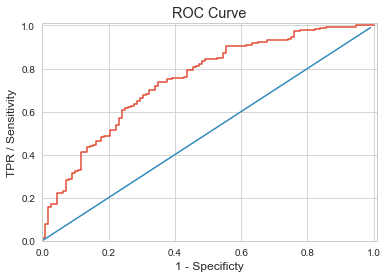

In [61]:
# ROC Curve y AUC
# y_pred_proba = logistic_regression.predict_proba(X_test)

from sklearn.metrics import roc_curve
fpr_knn,tpr_knn,thr_knn = roc_curve(y_test, y_pred_RegLogModif_proba[:,1])

df = pd.DataFrame(dict(fpr=fpr_knn, tpr=tpr_knn, thr = thr_knn))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [62]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_knn, tpr_knn))

AUC= 0.7462301587301587


In [63]:
# Pertenencia a partir de las probabilidades
pd.Series(y_pred_RegLogModif_proba[:,1]>0.5).astype(int).value_counts()

1    202
0     90
dtype: int64

In [64]:
# Pertenencia calculada a partir del método .predict()
pd.Series(y_pred).value_counts()

0.0    168
1.0    124
dtype: int64

In [65]:
from sklearn.preprocessing import binarize
y_pred_03 = binarize(y_pred_RegLogModif_proba, threshold=0.3)[:,1]

In [66]:
y_pred_03 = (y_pred_RegLogModif_proba[:,1] > 0.3).astype(int)

In [67]:
print('Matrix Original')
display(confusion_matrix(y_test,y_pred))
print('')
print('Nueva Matrix')
display(confusion_matrix(y_test,y_pred_03))

Matrix Original


array([[ 88,  24],
       [ 80, 100]], dtype=int64)


Nueva Matrix


array([[ 27,  85],
       [  7, 173]], dtype=int64)

In [68]:
#LLamamos a la funcion para calcular las petricas
resultados_metricas=Calculo_Metricas(y_test, y_pred_03)

#Agregamos los datos del modelo al cuadro comparativo

Valores = [resultados_metricas[0], resultados_metricas[1][1,1], resultados_metricas[1][0,0], 
           resultados_metricas[1][0,1], resultados_metricas[1][1,0], resultados_metricas[2], 
           resultados_metricas[3], resultados_metricas[4], resultados_metricas[5], resultados_metricas[6]]

Metricas.insert(Metricas.shape[1], "Reg. Log. umbral0.3", Valores, allow_duplicates=False)
print(Metricas)

                KNN  MultinomialNB  GaussianNB  Reg. Log.  Reg. Log. Modific.  \
Accuracy       0.67           0.64        0.64       0.67                0.71   
TP           134.00         118.00      100.00     139.00              148.00   
TN            63.00          69.00       88.00      57.00               58.00   
FP            49.00          43.00       24.00      55.00               54.00   
FN            46.00          62.00       80.00      41.00               32.00   
Recall         0.74           0.66        0.56       0.77                0.82   
Specificity    0.56           0.62        0.79       0.51                0.52   
Precision      0.73           0.73        0.81       0.72                0.73   
FPR            0.44           0.38        0.21       0.49                0.48   
F1-Score       0.74           0.69        0.66       0.74                0.77   

             Reg. Log. umbral0.3  
Accuracy                    0.68  
TP                        173.00  
TN 

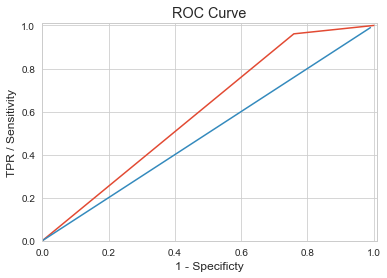

In [69]:
# # ROC Curve y AUC
# y_pred_proba = logistic_regression.predict_proba(X_test)

from sklearn.metrics import roc_curve
fpr_knn,tpr_knn,thr_knn = roc_curve(y_test, y_pred_03)

df = pd.DataFrame(dict(fpr=fpr_knn, tpr=tpr_knn, thr = thr_knn))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [70]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_knn, tpr_knn))

AUC= 0.6010912698412699


In [71]:
# from sklearn.metrics import roc_curve

fpr_log_knn,tpr_log_knn,thr_log_knn = roc_curve(y_test, y_pred_knn_proba[:,1])
fpr_log_MultinomialNB,tpr_log_MultinomialNB,thr_log_MultinomialNB = roc_curve(y_test, y_pred_MultinomialNB_proba[:,1])
fpr_log_GaussianNB,tpr_log_GaussianNB,thr_log_GaussianNB = roc_curve(y_test, y_pred_GaussianNB_proba[:,1])
fpr_log_RegLog,tpr_log_RegLog,thr_log_RegLog = roc_curve(y_test, y_pred_RegLog_proba[:,1])
fpr_log_RegLogModif,tpr_log_RegLogModif,thr_log_RegLogModif = roc_curve(y_test, y_pred_RegLogModif_proba[:,1])
fpr_log_y_pred_03,tpr_log_y_pred_03,thr_log_y_pred_03 = roc_curve(y_test, y_pred_03)


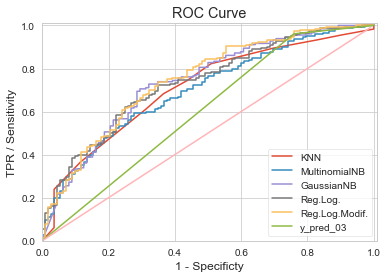

In [72]:
df_knn = pd.DataFrame(dict(fpr=fpr_log_knn, tpr=tpr_log_knn, thr = thr_log_knn))
plt.plot(df_knn['fpr'],df_knn['tpr'], label='KNN')

df_MultinomialNB = pd.DataFrame(dict(fpr=fpr_log_MultinomialNB, tpr=tpr_log_MultinomialNB, thr = thr_log_MultinomialNB))
plt.plot(df_MultinomialNB['fpr'],df_MultinomialNB['tpr'], label='MultinomialNB')

df_GaussianNB = pd.DataFrame(dict(fpr=fpr_log_GaussianNB, tpr=tpr_log_GaussianNB, thr = thr_log_GaussianNB))
plt.plot(df_GaussianNB['fpr'],df_GaussianNB['tpr'], label='GaussianNB')

df_RegLog = pd.DataFrame(dict(fpr=fpr_log_RegLog, tpr=tpr_log_RegLog, thr = thr_log_RegLog))
plt.plot(df_RegLog['fpr'],df_RegLog['tpr'], label='Reg.Log.')

df_RegLogModif = pd.DataFrame(dict(fpr=fpr_log_RegLogModif, tpr=tpr_log_RegLogModif, thr = thr_log_RegLogModif))
plt.plot(df_RegLogModif['fpr'],df_RegLogModif['tpr'], label='Reg.Log.Modif.')

df_y_pred_03 = pd.DataFrame(dict(fpr=fpr_log_y_pred_03, tpr=tpr_log_y_pred_03, thr = thr_log_y_pred_03))
plt.plot(df_y_pred_03['fpr'],df_y_pred_03['tpr'], label='y_pred_03')


plt.axis([0, 1.01, 0, 1.01]); plt.legend()
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

#### Análisis del modelo de regresion logística obtenido 

In [73]:
df_10.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
1145,Kelvin Cato,74,13.6,3.8,1.3,3.1,42.8,0.0,0.0,0.0,...,1.7,68.8,1.2,2.2,3.4,0.3,0.4,1.3,0.6,1.0
987,Ryan Humphrey,48,9.3,1.9,0.7,2.5,29.2,0.0,0.0,0.0,...,0.8,59.0,0.7,1.4,2.1,0.2,0.2,0.4,0.5,0.0
1051,Isaiah Whitehead,25,22.6,6.7,2.6,6.4,41.3,0.5,1.8,28.3,...,1.2,76.7,0.2,2.0,2.2,3.0,0.7,0.5,2.2,0.0
779,Al Thornton,79,27.3,12.7,4.7,11.0,42.9,0.5,1.6,33.1,...,3.6,74.3,1.2,3.3,4.5,1.2,0.6,0.5,1.6,0.0
423,Randy Wittman,78,13.7,4.5,2.1,4.1,50.3,0.0,0.1,40.0,...,0.6,60.9,0.2,0.7,0.9,0.9,0.2,0.0,0.4,1.0


In [74]:
X_test_10 = df_10.drop(['target_5yrs','name','fta','dreb','oreb','ftm','3pa','3p_made','fga','fgm'], axis=1)

In [76]:
y_test_10_pred = logistic_regression.predict(X_test_10)

In [82]:
cuadro = pd.DataFrame(data=df_10, columns=['name','target_5yrs'])
cuadro = cuadro.reset_index(drop=True)
cuadro['target pred'] = pd.DataFrame(data =y_test_10_pred)
cuadro


,name,target_5yrs,target pred
0,Kelvin Cato,1.0,1.0
1,Ryan Humphrey,0.0,0.0
2,Isaiah Whitehead,0.0,0.0
3,Al Thornton,0.0,1.0
4,Randy Wittman,1.0,1.0
...,...,...,...
125,Jamie Feick,1.0,1.0
126,Chris Porter,0.0,0.0
127,Eddie Johnson,1.0,1.0
128,Kendall Marshall,0.0,0.0


In [89]:
cuadro['real - pred']  = cuadro.apply(lambda x: x['target_5yrs']- x['target pred'], axis=1)

In [92]:
cuadro['real - pred'].value_counts()

 0.0    99
-1.0    16
 1.0    15
Name: real - pred, dtype: int64